In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

In [2]:
df = pd.read_csv("Financials.csv")
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [4]:
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

### Here column names in this dataframe have padding and they need striping for the sake of convenience.

In [5]:
column_names = []
for col_name in df.columns:
    column_names.append(col_name.strip())

column_names

['Segment',
 'Country',
 'Product',
 'Discount Band',
 'Units Sold',
 'Manufacturing Price',
 'Sale Price',
 'Gross Sales',
 'Discounts',
 'Sales',
 'COGS',
 'Profit',
 'Date',
 'Month Number',
 'Month Name',
 'Year']

In [6]:
dict(list(zip([1,2,3], [4,5,6])))

{1: 4, 2: 5, 3: 6}

In [7]:
column_names_for_replace = dict(list(zip(df.columns, column_names)))
column_names_for_replace

{'Segment': 'Segment',
 'Country': 'Country',
 ' Product ': 'Product',
 ' Discount Band ': 'Discount Band',
 ' Units Sold ': 'Units Sold',
 ' Manufacturing Price ': 'Manufacturing Price',
 ' Sale Price ': 'Sale Price',
 ' Gross Sales ': 'Gross Sales',
 ' Discounts ': 'Discounts',
 '  Sales ': 'Sales',
 ' COGS ': 'COGS',
 ' Profit ': 'Profit',
 'Date': 'Date',
 'Month Number': 'Month Number',
 ' Month Name ': 'Month Name',
 'Year': 'Year'}

In [8]:
df.rename(columns=column_names_for_replace, inplace=True)

In [9]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [10]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [11]:
df["Discount Band"].unique()

array([' None ', ' Low ', ' Medium ', ' High '], dtype=object)

In [12]:
import re

In [13]:
result = re.findall(r"\d*[\,\.]\d*", "$32,670.00")
result

['32,670', '.00']

In [14]:
def amount_formatter(cell):
    if len(re.findall(r"\d*[\,\.]\d*", cell)) != 0:
        list_of_match = re.findall(r"\d*[\,\.]\d*", cell)
        str_amount = "".join(list_of_match)
        num_amount = float("".join(str_amount.split(",")))
    else:
        num_amount = 0
    return num_amount

In [15]:
columns_need_formatting = ["Units Sold", "Manufacturing Price", "Sale Price", "Gross Sales", "Discounts", "Sales", "COGS", "Profit"]

for col in columns_need_formatting:
    df[col] = df[col].apply(lambda x: amount_formatter(x))

df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,01/06/2014,6,June,2014


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Segment              700 non-null    object 
 1   Country              700 non-null    object 
 2   Product              700 non-null    object 
 3   Discount Band        700 non-null    object 
 4   Units Sold           700 non-null    float64
 5   Manufacturing Price  700 non-null    float64
 6   Sale Price           700 non-null    float64
 7   Gross Sales          700 non-null    float64
 8   Discounts            700 non-null    float64
 9   Sales                700 non-null    float64
 10  COGS                 700 non-null    float64
 11  Profit               700 non-null    float64
 12  Date                 700 non-null    object 
 13  Month Number         700 non-null    int64  
 14  Month Name           700 non-null    object 
 15  Year                 700 non-null    int

In [17]:
df["Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        700 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    float64       
 6   Sale Price           700 non-null    float64       
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9   Sales                700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [18]:
df.to_csv("Financials_formatted.csv")

In [19]:
formatted_data = pd.read_csv("Financials_formatted.csv")
formatted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           700 non-null    int64  
 1   Segment              700 non-null    object 
 2   Country              700 non-null    object 
 3   Product              700 non-null    object 
 4   Discount Band        700 non-null    object 
 5   Units Sold           700 non-null    float64
 6   Manufacturing Price  700 non-null    float64
 7   Sale Price           700 non-null    float64
 8   Gross Sales          700 non-null    float64
 9   Discounts            700 non-null    float64
 10  Sales                700 non-null    float64
 11  COGS                 700 non-null    float64
 12  Profit               700 non-null    float64
 13  Date                 700 non-null    object 
 14  Month Number         700 non-null    int64  
 15  Month Name           700 non-null    obj

In [20]:
df.set_index("Date", inplace=True)
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Month Name,Year
Date,,,,,,,,,,,,,,,
2014-01-01,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,1,January,2014
2014-01-01,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,1,January,2014
2014-01-06,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,6,June,2014
2014-01-06,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,6,June,2014
2014-01-06,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,6,June,2014


In [21]:
df.to_csv("FinancialFormattedIndexed.csv")

In [22]:
financial_data = pd.read_csv("FinancialFormattedIndexed.csv")
financial_data.head()

,Date,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Month Name,Year
0,2014-01-01,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,1,January,2014
1,2014-01-01,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,1,January,2014
2,2014-01-06,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,6,June,2014
3,2014-01-06,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,6,June,2014
4,2014-01-06,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,6,June,2014


In [23]:
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 700 non-null    object 
 1   Segment              700 non-null    object 
 2   Country              700 non-null    object 
 3   Product              700 non-null    object 
 4   Discount Band        700 non-null    object 
 5   Units Sold           700 non-null    float64
 6   Manufacturing Price  700 non-null    float64
 7   Sale Price           700 non-null    float64
 8   Gross Sales          700 non-null    float64
 9   Discounts            700 non-null    float64
 10  Sales                700 non-null    float64
 11  COGS                 700 non-null    float64
 12  Profit               700 non-null    float64
 13  Month Number         700 non-null    int64  
 14  Month Name           700 non-null    object 
 15  Year                 700 non-null    int

### A quick overview how all the variables are related.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


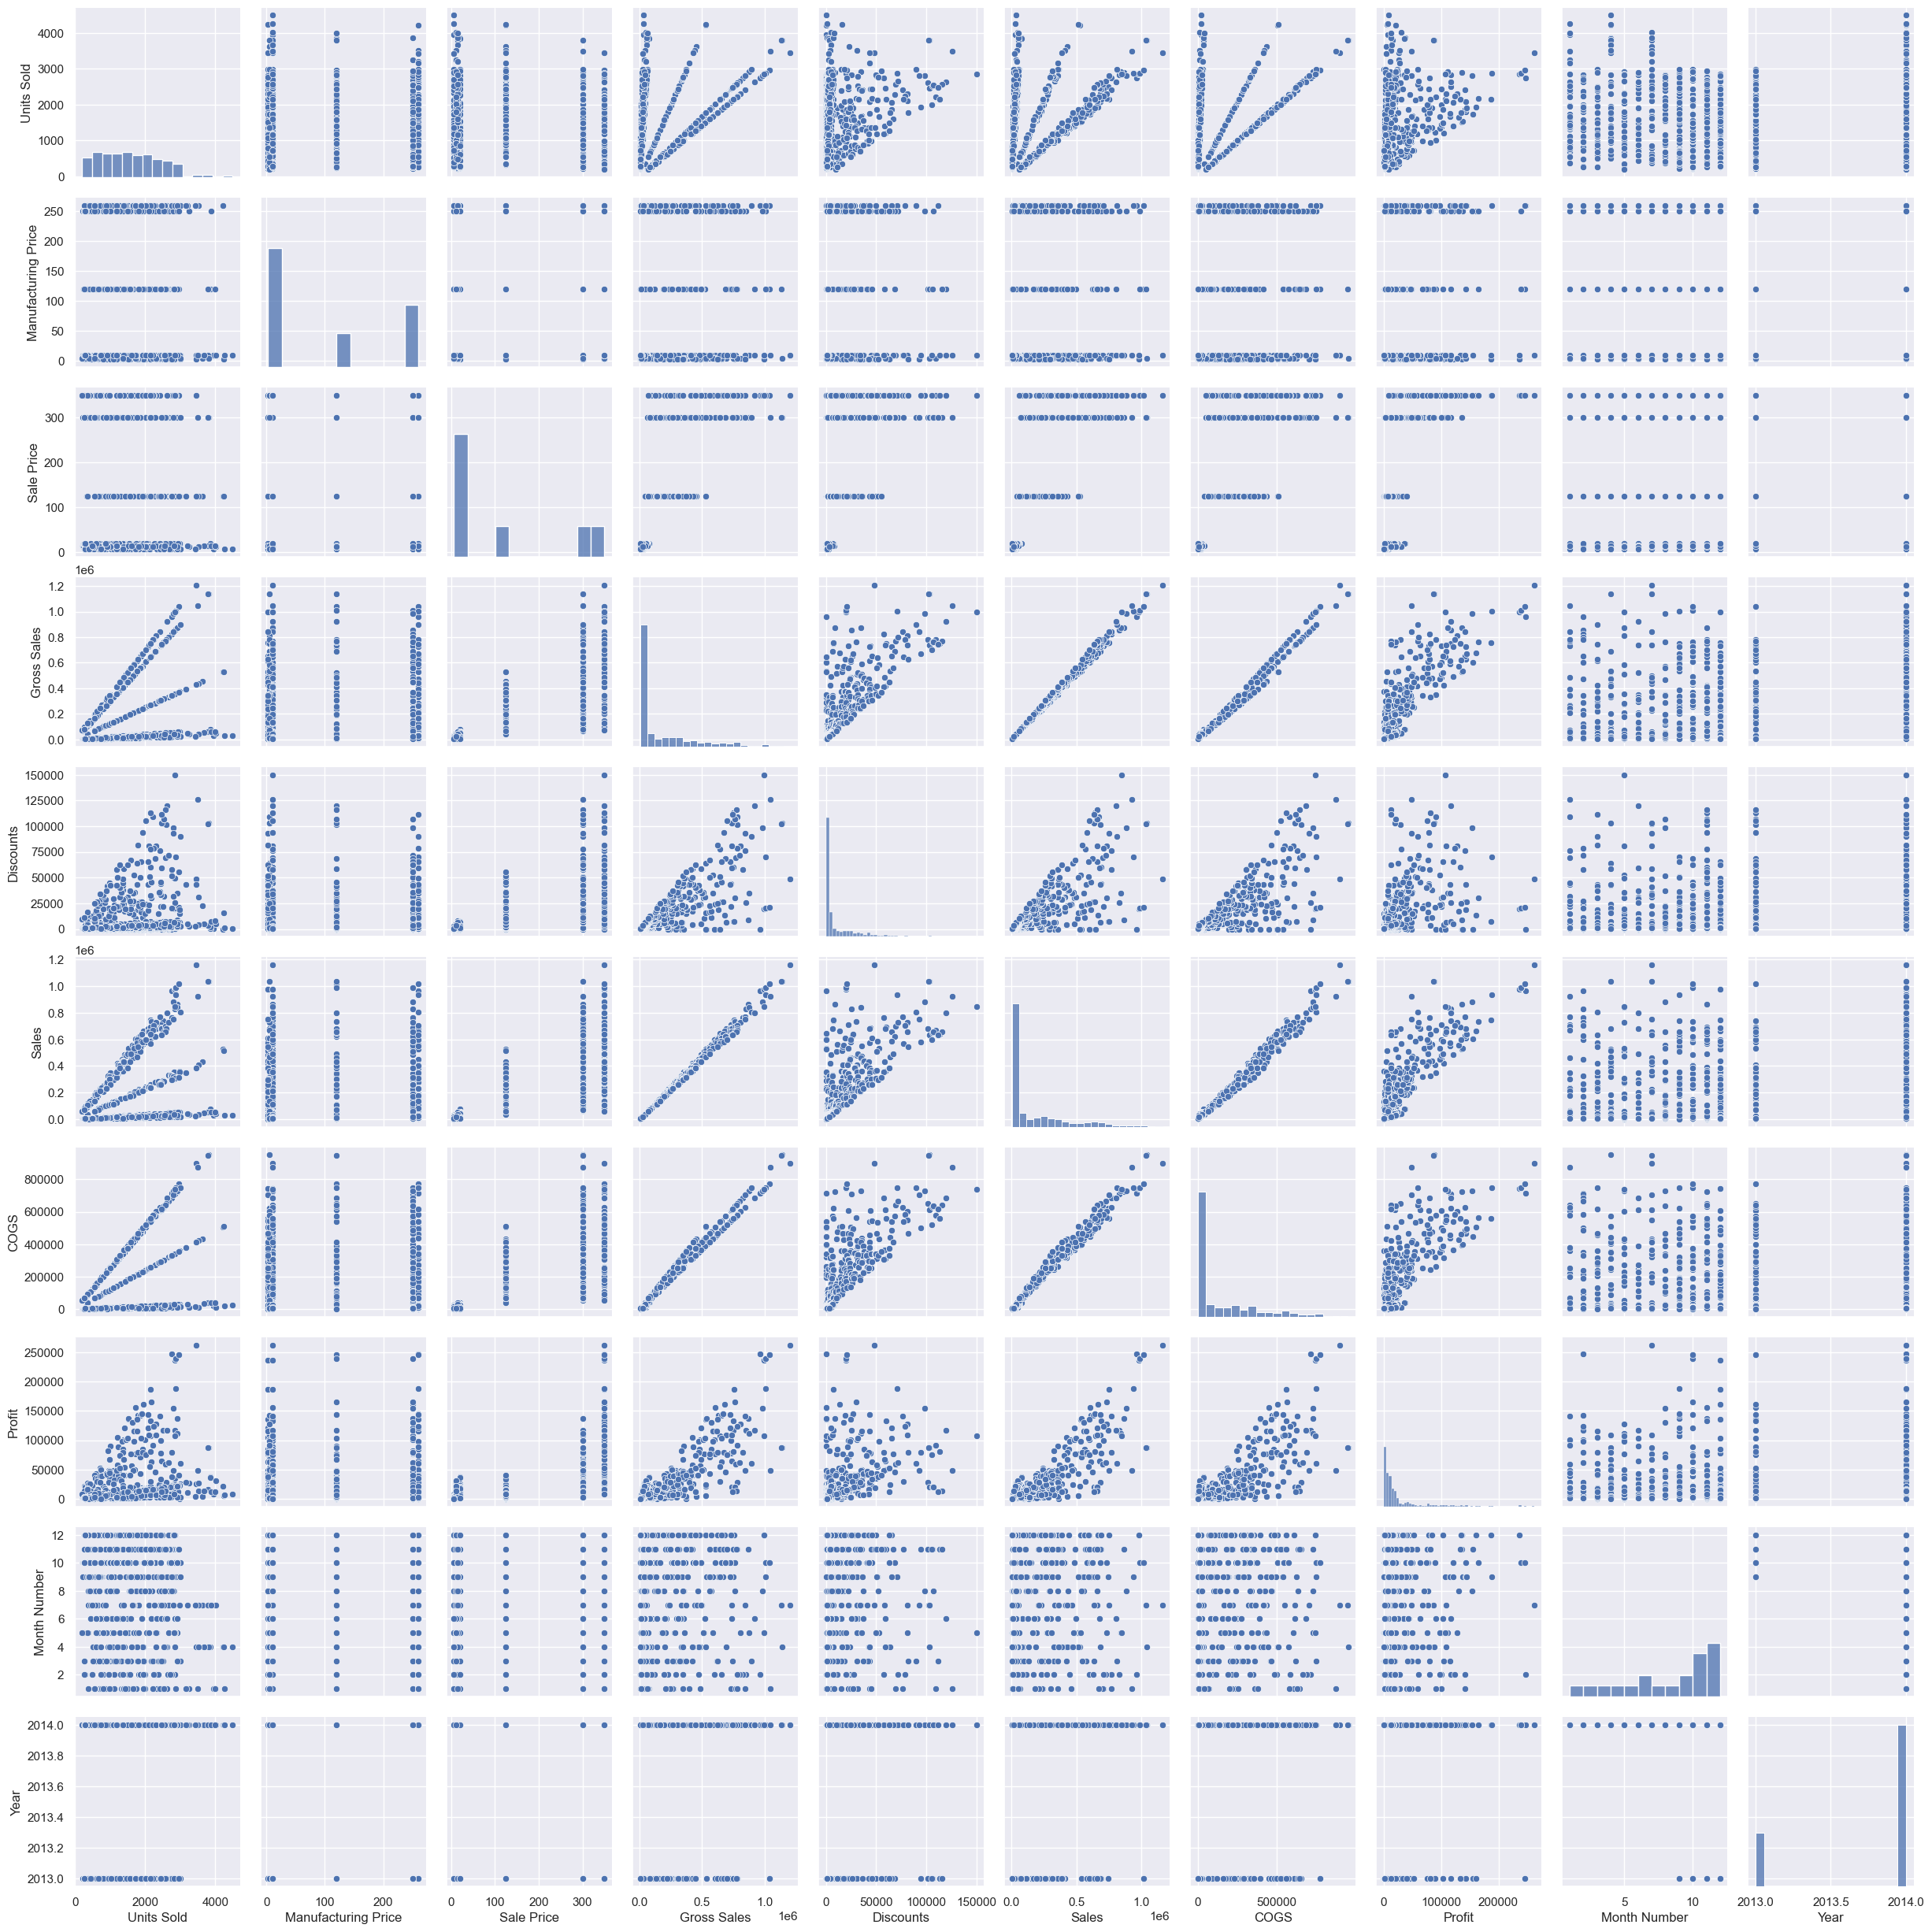

In [24]:
sns.pairplot(df)

In [25]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Month Name,Year
Date,,,,,,,,,,,,,,,
2014-01-01,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,1,January,2014
2014-01-01,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,1,January,2014
2014-01-06,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,6,June,2014
2014-01-06,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,6,June,2014
2014-01-06,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,6,June,2014


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 700 entries, 2014-01-01 to 2014-01-05
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Segment              700 non-null    object 
 1   Country              700 non-null    object 
 2   Product              700 non-null    object 
 3   Discount Band        700 non-null    object 
 4   Units Sold           700 non-null    float64
 5   Manufacturing Price  700 non-null    float64
 6   Sale Price           700 non-null    float64
 7   Gross Sales          700 non-null    float64
 8   Discounts            700 non-null    float64
 9   Sales                700 non-null    float64
 10  COGS                 700 non-null    float64
 11  Profit               700 non-null    float64
 12  Month Number         700 non-null    int64  
 13  Month Name           700 non-null    object 
 14  Year                 700 non-null    int64  
dtypes: float64(8), int64(

In [27]:
from pandas.core.dtypes.common import is_numeric_dtype

In [28]:
numeric_columns = []

for column in df.columns:
    if is_numeric_dtype(df[column]):
        numeric_columns.append(column)

numeric_columns

['Units Sold',
 'Manufacturing Price',
 'Sale Price',
 'Gross Sales',
 'Discounts',
 'Sales',
 'COGS',
 'Profit',
 'Month Number',
 'Year']

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 700 entries, 2014-01-01 to 2014-01-05
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Segment              700 non-null    object 
 1   Country              700 non-null    object 
 2   Product              700 non-null    object 
 3   Discount Band        700 non-null    object 
 4   Units Sold           700 non-null    float64
 5   Manufacturing Price  700 non-null    float64
 6   Sale Price           700 non-null    float64
 7   Gross Sales          700 non-null    float64
 8   Discounts            700 non-null    float64
 9   Sales                700 non-null    float64
 10  COGS                 700 non-null    float64
 11  Profit               700 non-null    float64
 12  Month Number         700 non-null    int64  
 13  Month Name           700 non-null    object 
 14  Year                 700 non-null    int64  
dtypes: float64(8), int64(

In [30]:
import seaborn.objects as so

In [31]:
df.Country.unique()

array(['Canada', 'Germany', 'France', 'Mexico',
       'United States of America'], dtype=object)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


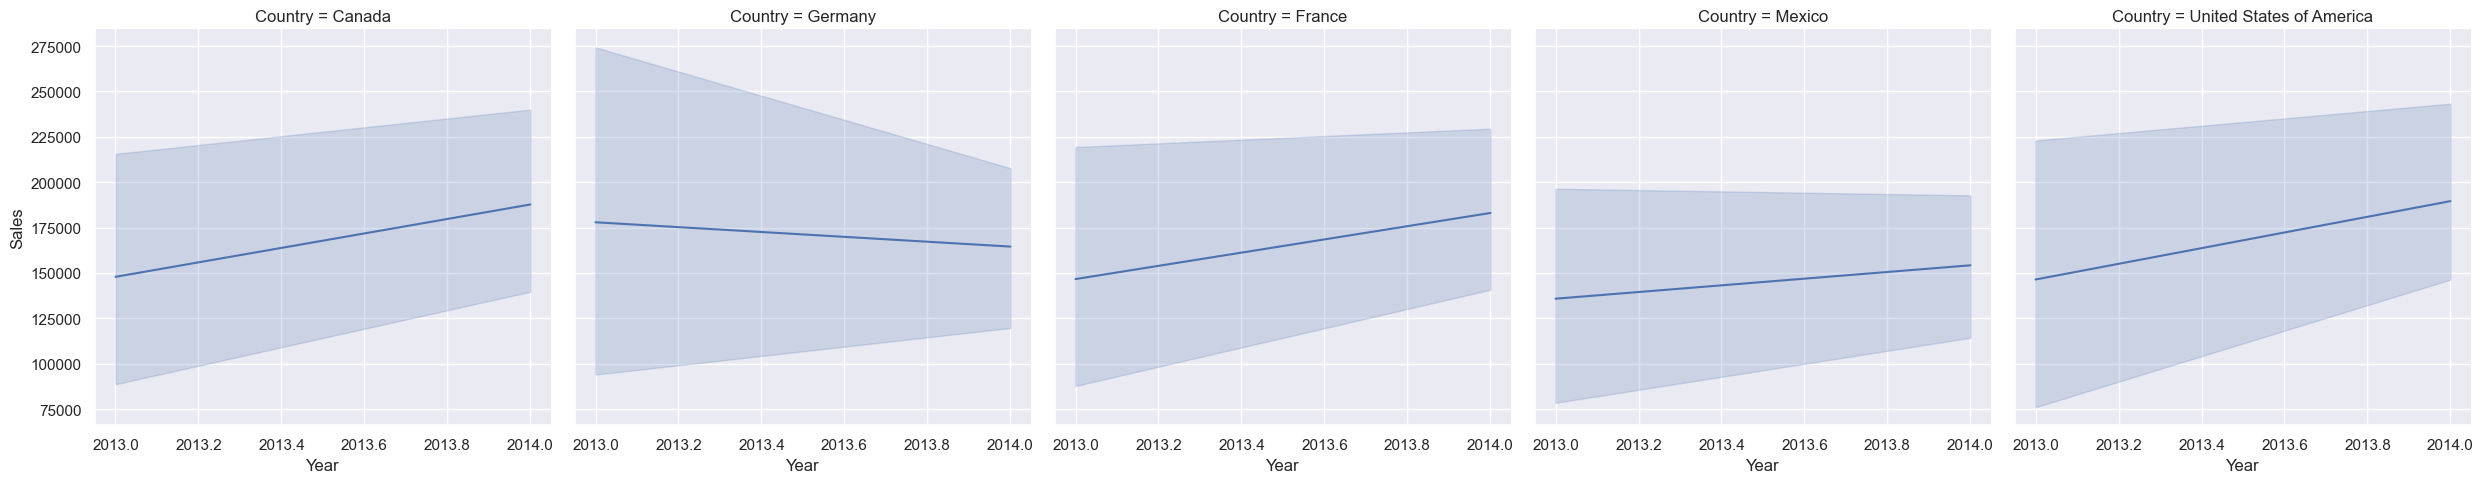

In [32]:
sns.relplot(data=df, x="Year", y="Sales", col="Country", kind="line")

### <b style="color:#D3643C">Insight from chart above :</b>
- this line chart shows trend of sales in the interval of 2013 till the beginning of 2014.
- Canada, France, Mexico, USA shows increase of sales over the course of time.
- the line chart shows Germany's sale has decreased over time.

In [33]:
mean_sales_per_country = df.groupby(["Country"])["Sales"].mean().reset_index()
mean_sales_per_country

,Country,Sales
0,Canada,177768.963500
1,France,173958.373500
2,Germany,167895.291571
3,Mexico,149638.229357
4,United States of America,178784.501286


In [34]:
import matplotlib as mpl

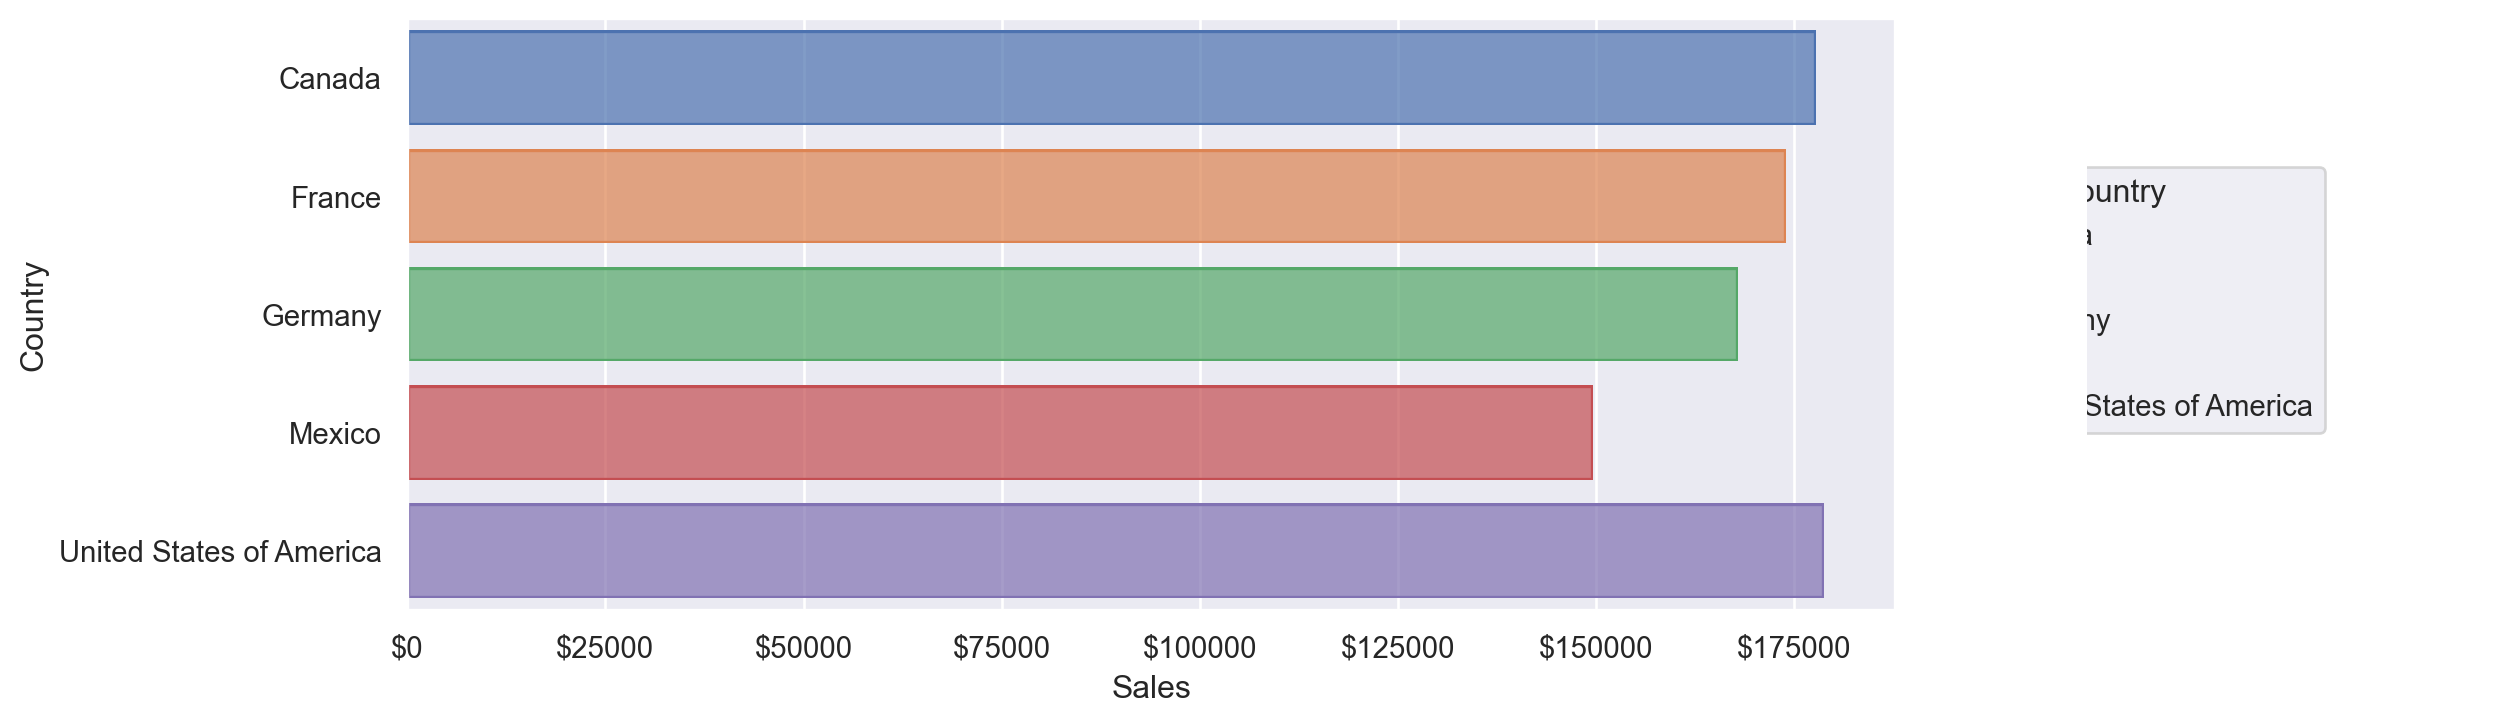

In [35]:
fig = mpl.figure.Figure(figsize=(10, 4))
sf = fig.subfigures()

(
    so.Plot(data=mean_sales_per_country, x="Sales", y="Country",color="Country")
    .add(so.Bar())
    .on(sf)
    .scale(x=so.Continuous().label(like="${x:.0f}"))
    .plot()
)


### <b style="color:#D3643C">Insight from chart above :</b>
- USA has the highest mean sale ( $ 178784.50 )
- then Canada followed by France

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


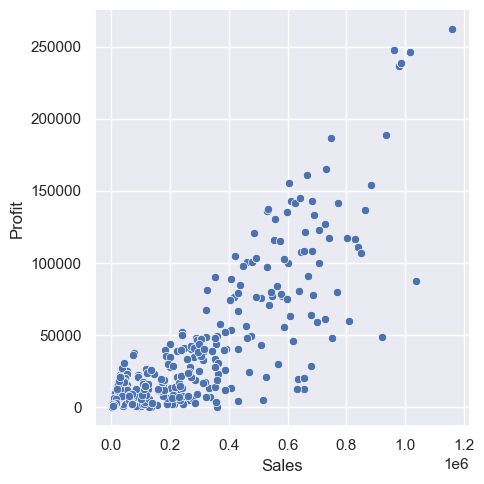

In [36]:
sns.relplot(data=df, x="Sales", y="Profit")

### <b style="color:#D3643C">Insight from chart above :</b>
 - Sales and Profit has a Proportional relationship
 - as sales increase so do profit

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


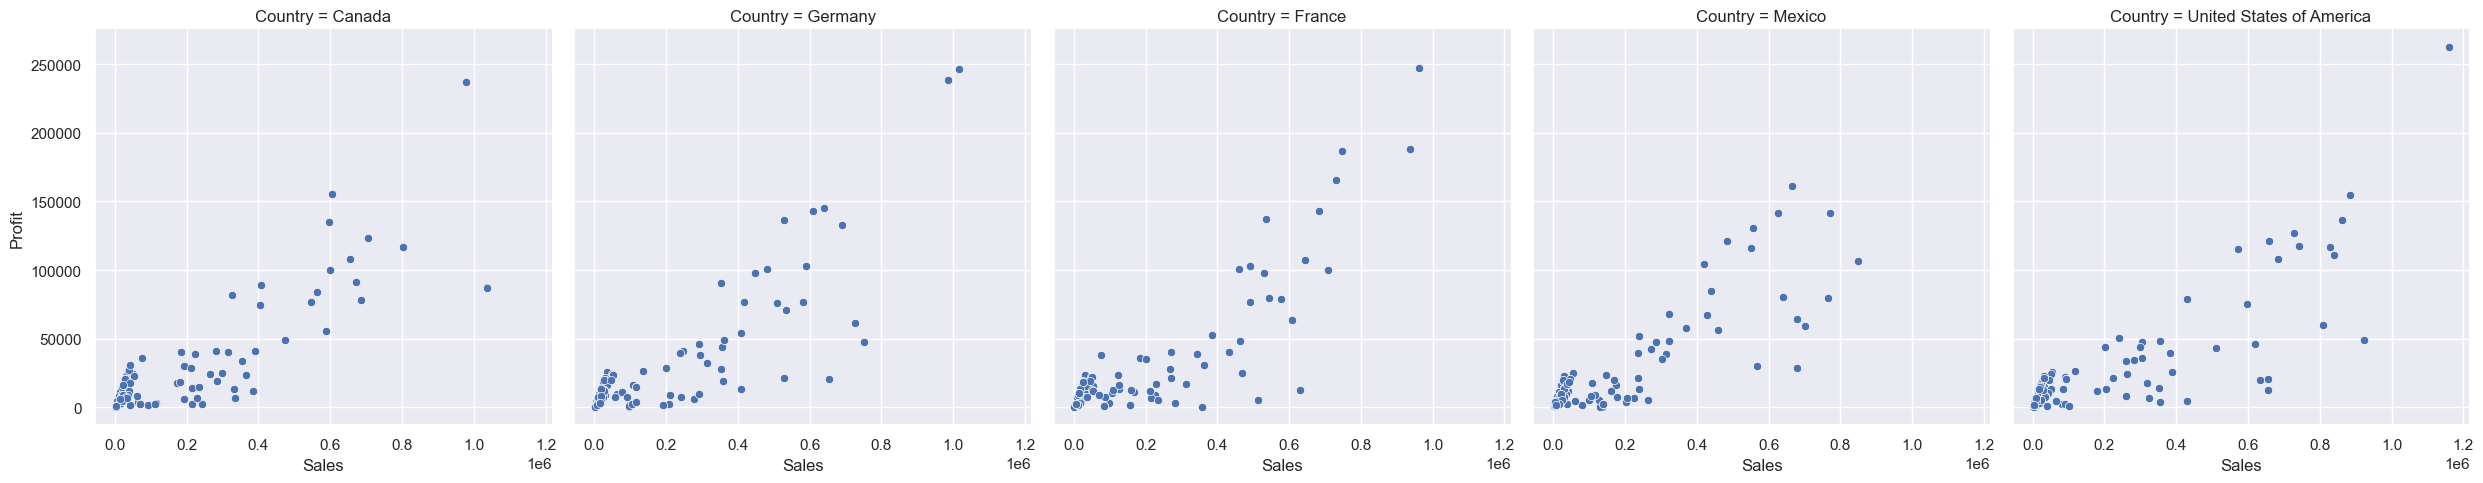

In [37]:
sns.relplot(data=df, x="Sales", y="Profit", col="Country")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


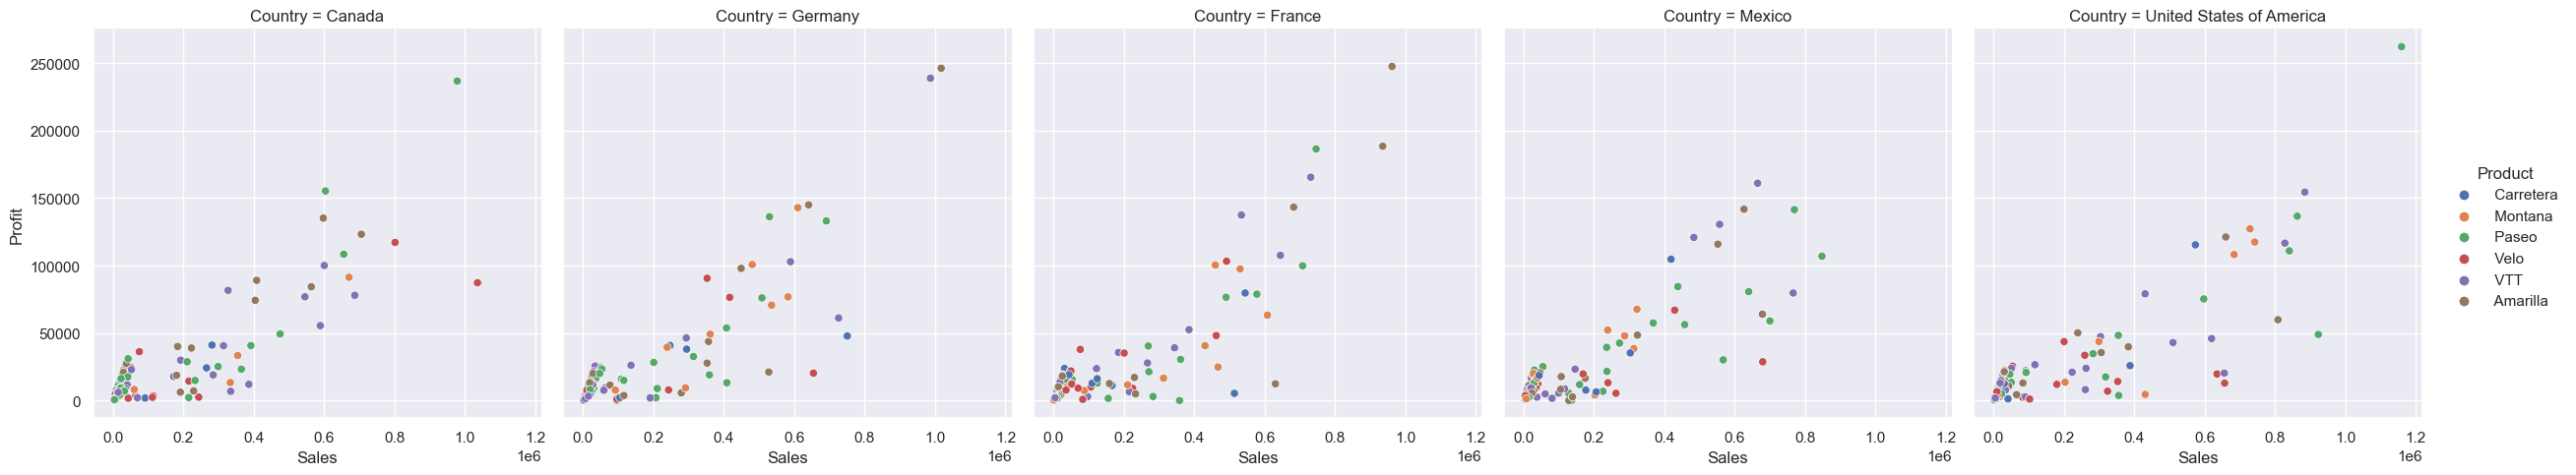

In [40]:
sns.relplot(df, x="Sales", y="Profit", hue="Product", col="Country")

In [47]:
df["Country"].unique()

array(['Canada', 'Germany', 'France', 'Mexico',
       'United States of America'], dtype=object)

In [51]:
germany_df = df[df.Country == 'Germany']
germany_df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Month Name,Year
Date,,,,,,,,,,,,,,,
2014-01-01,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.00,26420.00,13210.0,13210.00,1,January,2014
2014-01-06,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.00,13320.00,8880.0,4440.00,6,June,2014
2014-01-12,Government,Germany,Carretera,None,1513.0,3.0,350.0,529550.0,0.00,529550.00,393380.0,136170.00,12,December,2014
2014-01-03,Midmarket,Germany,Montana,None,921.0,5.0,15.0,13815.0,0.00,13815.00,9210.0,4605.00,3,March,2014
2014-01-06,Channel Partners,Germany,Montana,None,1545.0,5.0,12.0,18540.0,0.00,18540.00,4635.0,13905.00,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-10,Enterprise,Germany,Paseo,High,1085.0,10.0,125.0,135625.0,20343.75,115281.25,130200.0,14918.75,10,October,2014
2014-01-10,Midmarket,Germany,Paseo,High,1175.0,10.0,15.0,17625.0,2643.75,14981.25,11750.0,3231.25,10,October,2014
2014-01-07,Midmarket,Germany,VTT,High,492.0,250.0,15.0,7380.0,1107.00,6273.00,4920.0,1353.00,7,July,2014


In [52]:
canada_df = df[df.Country == 'Canada']
canada_df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Month Name,Year
Date,,,,,,,,,,,,,,,
2014-01-01,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.00,32370.00,16185.0,16185.00,1,January,2014
2014-01-06,Channel Partners,Canada,Montana,None,2518.0,5.0,12.0,30216.0,0.00,30216.00,7554.0,22662.00,6,June,2014
2014-01-07,Enterprise,Canada,Montana,None,2665.5,5.0,125.0,333187.5,0.00,333187.50,319860.0,13327.50,7,July,2014
2013-01-10,Enterprise,Canada,Montana,None,345.0,5.0,125.0,43125.0,0.00,43125.00,41400.0,1725.00,10,October,2013
2014-01-02,Government,Canada,Paseo,None,292.0,10.0,20.0,5840.0,0.00,5840.00,2920.0,2920.00,2,February,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-04,Midmarket,Canada,Paseo,High,1614.0,10.0,15.0,24210.0,3631.50,20578.50,16140.0,4438.50,4,April,2014
2014-01-08,Midmarket,Canada,Paseo,High,2559.0,10.0,15.0,38385.0,5757.75,32627.25,25590.0,7037.25,8,August,2014
2014-01-07,Government,Canada,VTT,High,865.5,250.0,20.0,17310.0,2596.50,14713.50,8655.0,6058.50,7,July,2014


In [53]:
france_df = df[df.Country == 'France']
france_df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Month Name,Year
Date,,,,,,,,,,,,,,,
2014-01-06,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.00,32670.00,21780.0,10890.00,6,June,2014
2014-01-06,Government,France,Montana,None,1899.0,5.0,20.0,37980.0,0.00,37980.00,18990.0,18990.00,6,June,2014
2013-01-09,Midmarket,France,Paseo,None,549.0,10.0,15.0,8235.0,0.00,8235.00,5490.0,2745.00,9,September,2013
2014-01-02,Enterprise,France,Velo,None,1804.0,120.0,125.0,225500.0,0.00,225500.00,216480.0,9020.00,2,February,2014
2014-01-06,Midmarket,France,VTT,None,2178.0,250.0,15.0,32670.0,0.00,32670.00,21780.0,10890.00,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-12,Government,France,Paseo,High,293.0,10.0,20.0,5860.0,879.00,4981.00,2930.0,2051.00,12,December,2014
2014-01-05,Midmarket,France,Velo,High,2826.0,120.0,15.0,42390.0,6358.50,36031.50,28260.0,7771.50,5,May,2014
2014-01-09,Enterprise,France,Velo,High,663.0,120.0,125.0,82875.0,12431.25,70443.75,79560.0,9116.25,9,September,2014


In [54]:
mexico_df = df[df.Country == 'Mexico']
mexico_df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Month Name,Year
Date,,,,,,,,,,,,,,,
2014-01-06,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,6,June,2014
2014-01-06,Midmarket,Mexico,Montana,None,2470.0,5.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,6,June,2014
2014-01-08,Small Business,Mexico,Montana,None,958.0,5.0,300.0,287400.0,0.0,287400.0,239500.0,47900.0,8,August,2014
2014-01-02,Midmarket,Mexico,Paseo,None,974.0,10.0,15.0,14610.0,0.0,14610.0,9740.0,4870.0,2,February,2014
2014-01-08,Government,Mexico,Paseo,None,883.0,10.0,7.0,6181.0,0.0,6181.0,4415.0,1766.0,8,August,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-05,Government,Mexico,Paseo,High,2851.0,10.0,350.0,997850.0,149677.5,848172.5,741260.0,106912.5,5,May,2014
2013-01-11,Government,Mexico,Paseo,High,2151.0,10.0,350.0,752850.0,112927.5,639922.5,559260.0,80662.5,11,November,2013
2014-01-03,Channel Partners,Mexico,Velo,High,500.0,120.0,12.0,6000.0,900.0,5100.0,1500.0,3600.0,3,March,2014


In [55]:
usa_df = df[df.Country == 'United States of America']
usa_df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Month Name,Year
Date,,,,,,,,,,,,,,,
2014-01-12,Midmarket,United States of America,Montana,None,615.0,5.0,15.0,9225.0,0.0,9225.0,6150.0,3075.0,12,December,2014
2014-01-10,Government,United States of America,Paseo,None,1143.0,10.0,7.0,8001.0,0.0,8001.0,5715.0,2286.0,10,October,2014
2013-01-11,Channel Partners,United States of America,Paseo,None,912.0,10.0,12.0,10944.0,0.0,10944.0,2736.0,8208.0,11,November,2013
2014-01-08,Enterprise,United States of America,Velo,None,2821.0,120.0,125.0,352625.0,0.0,352625.0,338520.0,14105.0,8,August,2014
2014-01-04,Channel Partners,United States of America,Amarilla,None,1953.0,260.0,12.0,23436.0,0.0,23436.0,5859.0,17577.0,4,April,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-11,Small Business,United States of America,Velo,High,2574.0,120.0,300.0,772200.0,115830.0,656370.0,643500.0,12870.0,11,November,2013
2013-01-12,Enterprise,United States of America,Velo,High,2438.0,120.0,125.0,304750.0,45712.5,259037.5,292560.0,33522.5,12,December,2013
2014-01-12,Channel Partners,United States of America,Velo,High,914.0,120.0,12.0,10968.0,1645.2,9322.8,2742.0,6580.8,12,December,2014


In [59]:
countries = df.Country.unique()
countries

array(['Canada', 'Germany', 'France', 'Mexico',
       'United States of America'], dtype=object)

Text(0.5, 1.0, 'Sales Vs Products for Canada')

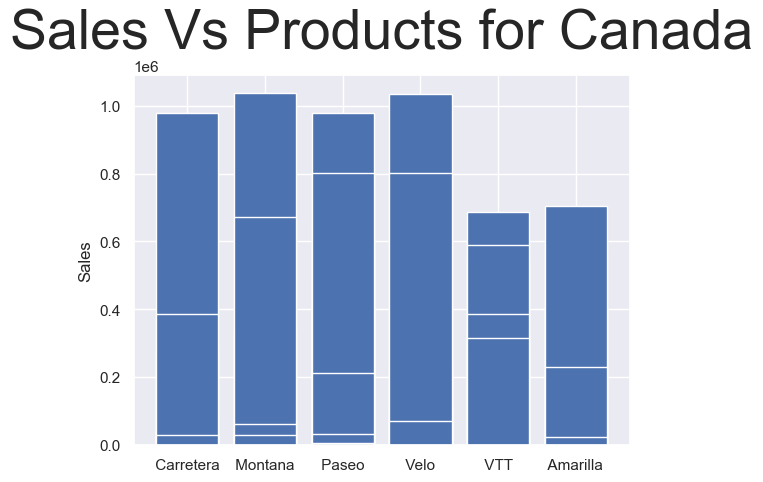

In [74]:
fig, ax = plt.subplots()

ax.bar(canada_df["Product"], canada_df["Sales"])

ax.set_ylabel('Sales')
ax.set_title('Sales Vs Products for Canada', fontsize = 40)

Text(0.5, 1.0, 'Sales Vs Products for Germany')

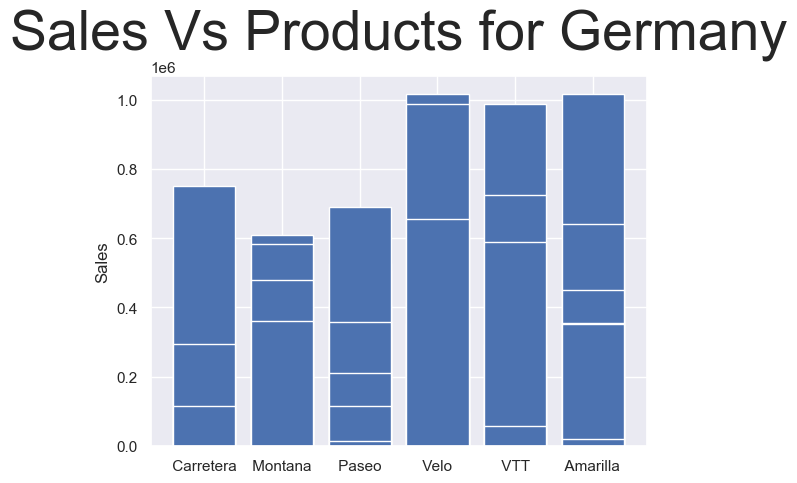

In [69]:
fig, ax = plt.subplots()

ax.bar(germany_df["Product"], germany_df["Sales"])

ax.set_ylabel('Sales')
ax.set_title('Sales Vs Products for', fontsize = 40)

Text(0.5, 1.0, 'Sales Vs Products for France')

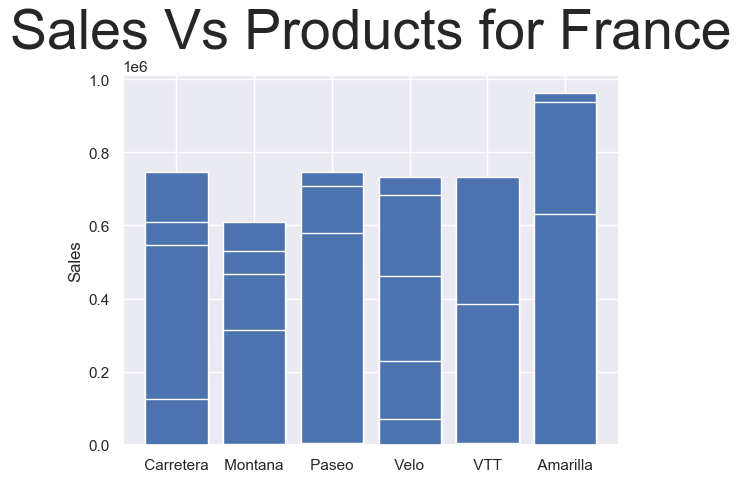

In [71]:
fig, ax = plt.subplots()

ax.bar(france_df["Product"], france_df["Sales"])

ax.set_ylabel('Sales')
ax.set_title('Sales Vs Products for France', fontsize = 40)

Text(0.5, 1.0, 'Sales Vs Products for Mexico')

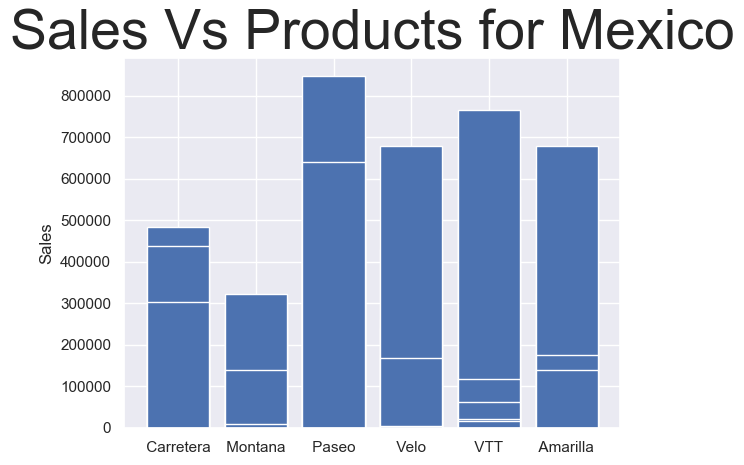

In [72]:
fig, ax = plt.subplots()

ax.bar(mexico_df["Product"], mexico_df["Sales"])

ax.set_ylabel('Sales')
ax.set_title('Sales Vs Products for Mexico', fontsize = 40)

Text(0.5, 1.0, 'Sales Vs Products for USA')

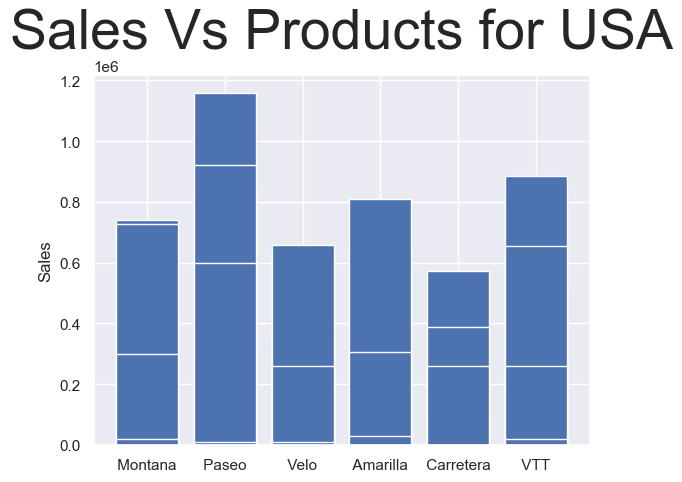

In [73]:
fig, ax = plt.subplots()

ax.bar(usa_df["Product"], usa_df["Sales"])

ax.set_ylabel('Sales')
ax.set_title('Sales Vs Products for USA', fontsize = 40)

Text(0.5, 1.0, 'Sales Vs Products for USA')

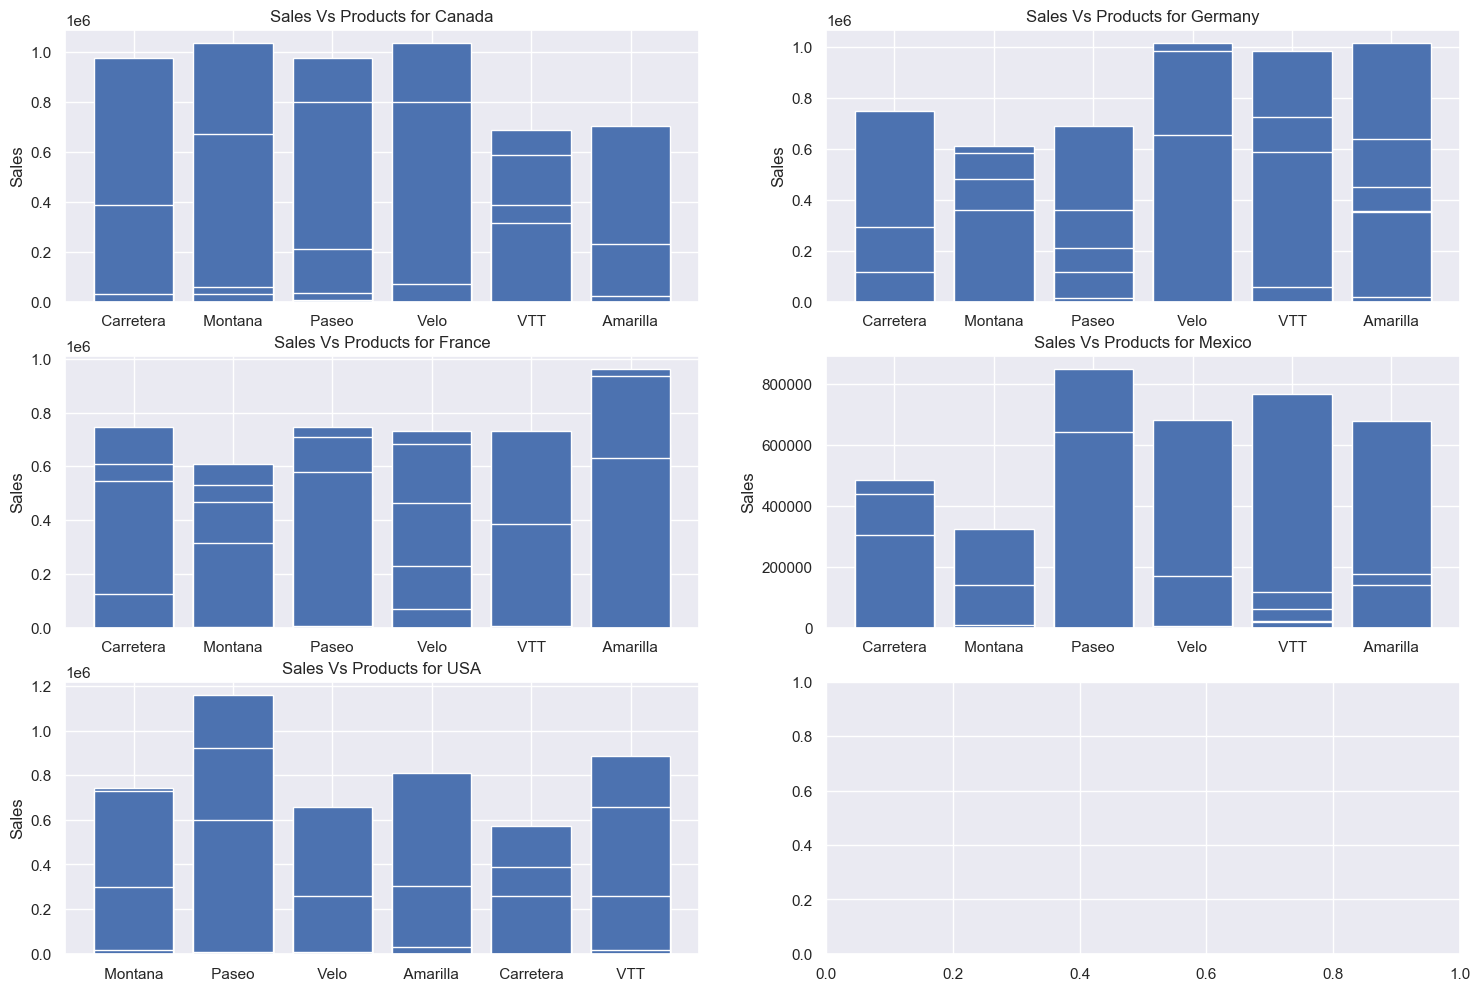

In [87]:
fig, ax = plt.subplots(3, 2, figsize=(18, 12))

ax[0,0].bar(canada_df["Product"], canada_df["Sales"])
ax[0,0].set_ylabel('Sales')
ax[0,0].set_title('Sales Vs Products for Canada', fontsize = 12)
ax[0,1].bar(germany_df["Product"], germany_df["Sales"])
ax[0,1].set_ylabel('Sales')
ax[0,1].set_title('Sales Vs Products for Germany', fontsize = 12)

ax[1, 0].bar(france_df["Product"], france_df["Sales"])
ax[1,0].set_ylabel('Sales')
ax[1,0].set_title('Sales Vs Products for France', fontsize = 12)
ax[1, 1].bar(mexico_df["Product"], mexico_df["Sales"])
ax[1,1].set_ylabel('Sales')
ax[1,1].set_title('Sales Vs Products for Mexico', fontsize = 12)

ax[2, 0].bar(usa_df["Product"], usa_df["Sales"])
ax[2,0].set_ylabel('Sales')
ax[2,0].set_title('Sales Vs Products for USA', fontsize = 12)

In [95]:
canada_sales_per_product = canada_df.groupby("Product").sum()["Sales"].reset_index()
canada_sales_per_product

,Product,Sales
0,Amarilla,3855765.88
1,Carretera,2610204.34
2,Montana,2711919.03
3,Paseo,7611520.99
4,VTT,4768754.31
5,Velo,3329490.34


In [105]:
list(canada_sales_per_product["Product"])

[' Amarilla ', ' Carretera ', ' Montana ', ' Paseo ', ' VTT ', ' Velo ']

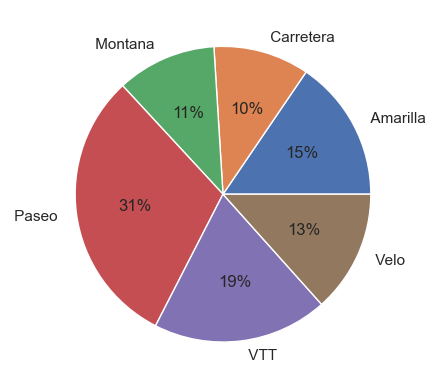

In [113]:
plt.pie(list(canada_sales_per_product["Sales"]), labels = list(canada_sales_per_product['Product']), autopct='%.0f%%');

In [115]:
germany_sales_per_product = germany_df.groupby("Product").sum()["Sales"].reset_index()
france_sales_per_product = france_df.groupby("Product").sum()["Sales"].reset_index()
mexico_sales_per_product = mexico_df.groupby("Product").sum()["Sales"].reset_index()
usa_sales_per_product = usa_df.groupby("Product").sum()["Sales"].reset_index()

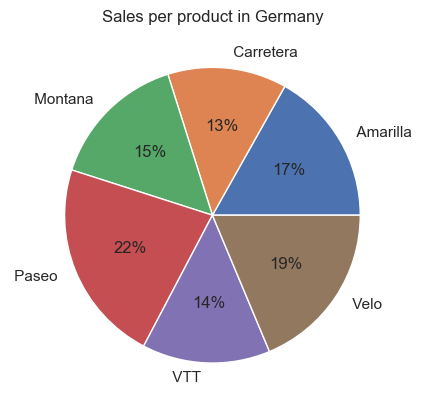

In [138]:
plt.pie(list(germany_sales_per_product["Sales"]), labels = list(germany_sales_per_product['Product']), autopct='%.0f%%')
plt.title('Sales per product in Germany', fontsize = 12);

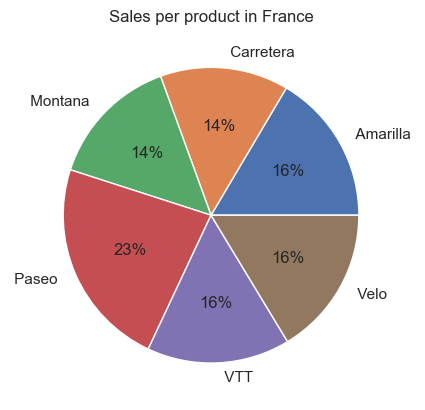

In [139]:
plt.pie(list(france_sales_per_product["Sales"]), labels = list(france_sales_per_product['Product']), autopct='%.0f%%')
plt.title('Sales per product in France', fontsize = 12);

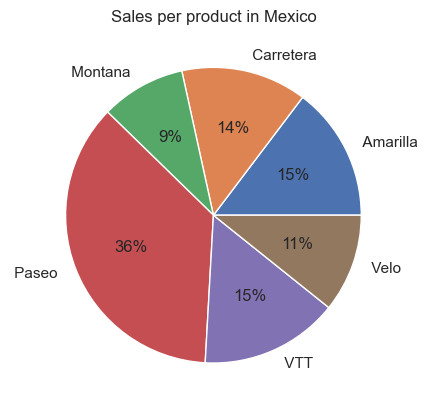

In [140]:
plt.pie(list(mexico_sales_per_product["Sales"]), labels = list(mexico_sales_per_product['Product']), autopct='%.0f%%')
plt.title('Sales per product in Mexico', fontsize = 12);

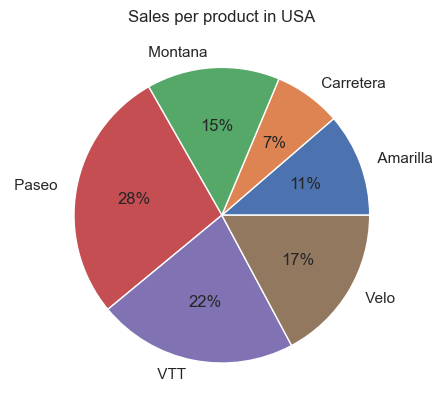

In [141]:
plt.pie(list(usa_sales_per_product["Sales"]), labels = list(usa_sales_per_product['Product']), autopct='%.0f%%')
plt.title('Sales per product in USA', fontsize = 12);

### Relative Sales per country in terms of Products

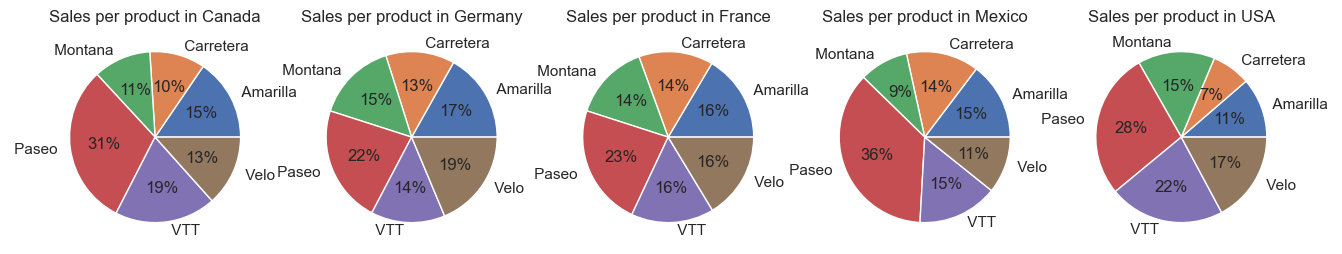

In [133]:
fig, ax = plt.subplots(1, 5, figsize=(16, 200))

ax[0].pie(list(canada_sales_per_product["Sales"]), labels = list(canada_sales_per_product['Product']), autopct='%.0f%%')
ax[0].set_title('Sales per product in Canada', fontsize = 12)

ax[1].pie(list(germany_sales_per_product["Sales"]), labels = list(germany_sales_per_product['Product']), autopct='%.0f%%')
ax[1].set_title('Sales per product in Germany', fontsize = 12)

ax[2].pie(list(france_sales_per_product["Sales"]), labels = list(france_sales_per_product['Product']), autopct='%.0f%%')
ax[2].set_title('Sales per product in France', fontsize = 12)

ax[3].pie(list(mexico_sales_per_product["Sales"]), labels = list(mexico_sales_per_product['Product']), autopct='%.0f%%')
ax[3].set_title('Sales per product in Mexico', fontsize = 12)

ax[4].pie(list(usa_sales_per_product["Sales"]), labels = list(usa_sales_per_product['Product']), autopct='%.0f%%')
ax[4].set_title('Sales per product in USA', fontsize = 12);

In [142]:
canada_profits_per_product = canada_df.groupby("Product").sum()["Profit"].reset_index()
germany_profits_per_product = germany_df.groupby("Product").sum()["Profit"].reset_index()
france_profits_per_product = france_df.groupby("Product").sum()["Profit"].reset_index()
mexico_profits_per_product = mexico_df.groupby("Product").sum()["Profit"].reset_index()
usa_profits_per_product = usa_df.groupby("Product").sum()["Profit"].reset_index()

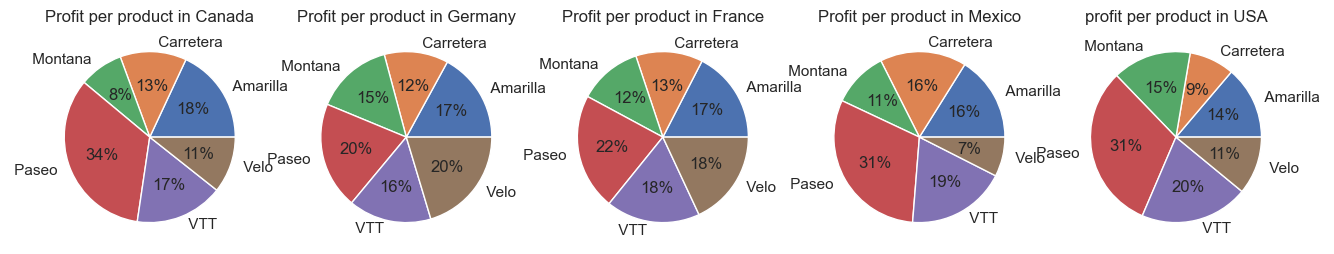

In [144]:
fig, ax = plt.subplots(1, 5, figsize=(16, 200))

ax[0].pie(list(canada_profits_per_product["Profit"]), labels = list(canada_profits_per_product['Product']), autopct='%.0f%%')
ax[0].set_title('Profit per product in Canada', fontsize = 12)

ax[1].pie(list(germany_profits_per_product["Profit"]), labels = list(germany_profits_per_product['Product']), autopct='%.0f%%')
ax[1].set_title('Profit per product in Germany', fontsize = 12)

ax[2].pie(list(france_profits_per_product["Profit"]), labels = list(france_profits_per_product['Product']), autopct='%.0f%%')
ax[2].set_title('Profit per product in France', fontsize = 12)

ax[3].pie(list(mexico_profits_per_product["Profit"]), labels = list(mexico_profits_per_product['Product']), autopct='%.0f%%')
ax[3].set_title('Profit per product in Mexico', fontsize = 12)

ax[4].pie(list(usa_profits_per_product["Profit"]), labels = list(usa_profits_per_product['Product']), autopct='%.0f%%')
ax[4].set_title('profit per product in USA', fontsize = 12);

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 700 entries, 2014-01-01 to 2014-01-05
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Segment              700 non-null    object 
 1   Country              700 non-null    object 
 2   Product              700 non-null    object 
 3   Discount Band        700 non-null    object 
 4   Units Sold           700 non-null    float64
 5   Manufacturing Price  700 non-null    float64
 6   Sale Price           700 non-null    float64
 7   Gross Sales          700 non-null    float64
 8   Discounts            700 non-null    float64
 9   Sales                700 non-null    float64
 10  COGS                 700 non-null    float64
 11  Profit               700 non-null    float64
 12  Month Number         700 non-null    int64  
 13  Month Name           700 non-null    object 
 14  Year                 700 non-null    int64  
dtypes: float64(8), int64(

In [151]:
df_numeric_correlation = df[['Units Sold','Manufacturing Price','Sale Price','Gross Sales','Discounts','Sales','COGS','Profit']].corr()
df_numeric_correlation

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit
Units Sold,1.000000,-0.029644,-0.065066,0.327221,0.253048,0.326914,0.331694,0.271680
Manufacturing Price,-0.029644,1.000000,0.070786,0.049852,0.020578,0.051549,0.046857,0.066768
Sale Price,-0.065066,0.070786,1.000000,0.808250,0.641689,0.805878,0.799335,0.674018
Gross Sales,0.327221,0.049852,0.808250,1.000000,0.782485,0.998174,0.994519,0.828931
Discounts,0.253048,0.020578,0.641689,0.782485,1.000000,0.743447,0.782930,0.439547
Sales,0.326914,0.051549,0.805878,0.998174,0.743447,1.000000,0.992244,0.847699
COGS,0.331694,0.046857,0.799335,0.994519,0.782930,0.992244,1.000000,0.779744
Profit,0.271680,0.066768,0.674018,0.828931,0.439547,0.847699,0.779744,1.000000


### The heatmap bellow shows correlation among numeric variables

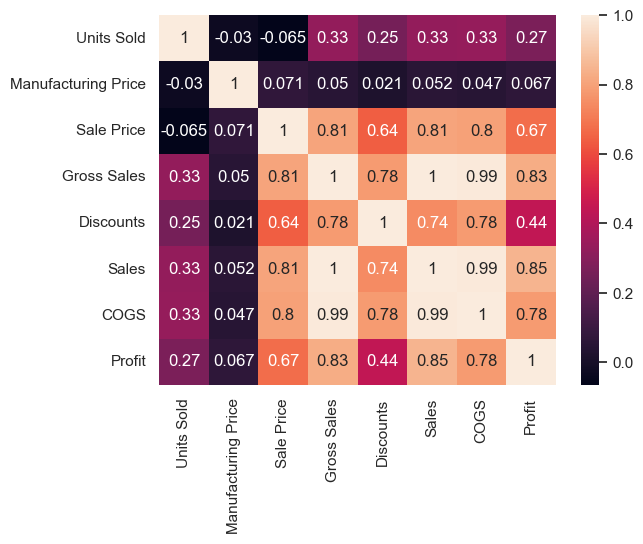

In [156]:
sns.heatmap(df_numeric_correlation, annot=True);

### key decisions:
- `Manufacturing Price` has a negative correlation with `Units Sold` because, as `manufacturing price` increase so does the `price` of products thus sale is a bit lesser.
- The higher the value is, the higher the correlation is, this indicates proportional relation.
- Negative correlations can be described in terms of negative slope, as one variable increases the other corresponding variable decreases.